# Dataset

(128, 2) (128,)
(32, 2) (32,)
(40, 2) (40,)


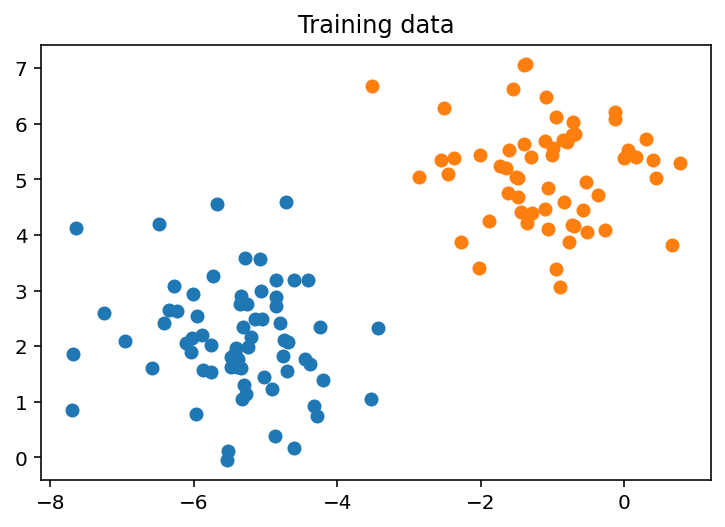

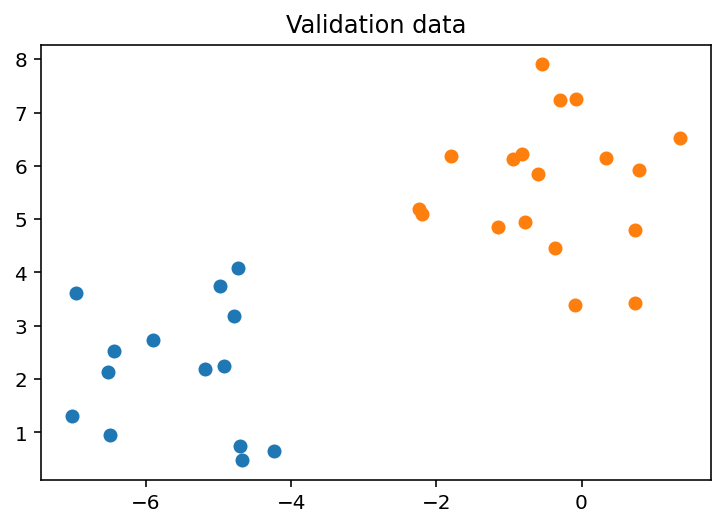

In [ ]:
from tqdm.notebook import trange
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format="retina"


def plot_data(x: np.ndarray, y: np.ndarray) -> None:
    class0_idx = np.where(y == -1)[0]
    class1_idx = np.where(y == 1)[0]
    feature0 = x[:, 0]
    feature1 = x[:, 1]
    plt.scatter(feature0[class0_idx], feature1[class0_idx], label="-1")
    plt.scatter(feature0[class1_idx], feature1[class1_idx], label="1")


def modify_label(label):
    return np.array([-1 if i == 0 else 1 for i in label])


x, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=2,
    cluster_std=1,
    center_box=(-9, 9),
    random_state=1234,
)


x_train_val, x_test, y_train_val, y_test = train_test_split(
    x, y, test_size=0.2, random_state=288
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.2, random_state=288
)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

y_train, y_val, y_test = map(modify_label, [y_train, y_val, y_test])

plot_data(x_train, y_train)
plt.title("Training data")
plt.show()
plot_data(x_val, y_val)
plt.title("Validation data")
plt.show()

# Primal

In [ ]:
from re import X
class SVMTrainer:
    def __init__(
        self,
        num_examples: int = x_train.shape[0],
        num_features: int = 2,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        c: float = 0.1,
        penalty: float = 100,
    ) -> None:
        """Initialize a support vector machine trainer."""
        self.c = c
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_examples = num_examples
        self.num_features = num_features

        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Initialize weights and bias. Depenending on your approach, you can either
        # initialize w and b separately or theta as a single vector. 

        self.w = np.zeros(self.num_features)
        self.b = np.zeros(1)


    def gradient_descent_step(self, x, y) -> None:
        """
        Perform a single step of gradient update. --> For all samples ! 

        --> !!! Looping through each sample and calling the gradient  ??

        Args:
            x: A matrix of features. --> 
            y: A vector of labels. -->  
        """

        for i in range(self.N):

          w_grad , b_grad = self.hinge_loss_derivative(x[i,:],y[i])

          self.w -= self.learning_rate*w_grad

          self.b -= self.learning_rate*b_grad


    def hinge_loss(self, pred, target) -> float:
        """
        Calculates the hinge loss given predictions and targets.

        Args:
            pred: Predicted labels.  --> 
            target: Ground-truth labels.

        Returns:
            A scalar of loss.
        """

        #N = self.N
        N = target.size 

        hinge_loss = 0.0

        for i in range(N):

          hinge_loss += ( 1 / 2*N )*( np.dot( self.w.T , self.w ) + self.c*max( 0 , 1 - target[i]*pred[i]) )

        return hinge_loss


    def hinge_loss_derivative(self, x, y) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta. --> For a single entry !! 

        --> So I need to loop through all entries and call this at each step !

        Args:
            x: Feature vectors. --> a single entry ?? 
            y: Ground-truth labels. --> a single value ?? 

        Returns:
            A vector with the same dimension as theta, or w and b if you choose to
            separate them.
        """

        my_bool = ( 1 - y*self.predict(x) > 0 ) 

        w_grad = np.array([0.0,0.0])

        w_grad += ( 1 / self.N )*(self.w)

        if my_bool:

          w_grad -= self.c*y*x

          b_grad = -self.c*y

        else:

          b_grad = 0

        return w_grad , b_grad 

    def accuracy(self, pred, target) -> float:
        """
        Calculates the percentage of matched labels given predictions and targets.

        Args:
            pred: Predicted labels (rounded probabilities).
            target: Ground-truth labels.

        Return:
            The accuracy score (a float) given the predicted labels and the true labels.
        """

        accuracy = 0 

        my_len = target.size

        for i in range(my_len):

          if target[i] == pred[i]:

            accuracy += 1
        
        return accuracy / my_len
      

    def predict(self, x) -> int:
        """
        Predict the label of input examples x.

        Args:
            x: Feature vectors. --> slice of x_set at index j 

        Returns:
            A scalar of either -1 or 1.
        """

        pred_item = np.dot(self.w.T,x) + self.b
        
        return np.sign(pred_item)


    def train(self, x_train, y_train, x_val, y_val) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Update theta.
            2. Calculate the training loss & accuracy given the current theta, and append 
               then to self.train_loss_history and self.train_acc_history.
            3. Calculate the validation loss & accuracy given the current theta, and 
               append then to self.train_loss_history and self.train_acc_history.

        If you wish to use the bias trick, please remember to use it before the for loop.

        Args:
            x_train: Feature vectors for training.
            y_train: Ground-truth labels for training.
            x_val: Feature vectors for validation.
            y_val: Ground-truth labels for validation.
        """

        self.N = self.num_examples

        for n in range(self.num_epochs):

          train_pred = np.zeros(y_train.size)

          val_pred = np.zeros(y_train.size)


          for j in range(y_train.size):

            train_pred[j] = self.predict(x_train[j,:])


          for k in range(y_val.size):

            val_pred[k] = self.predict(x_val[k,:])


          #for m in range(y_val.size):


          self.gradient_descent_step(x_train,y_train)


          self.train_loss_history.append( self.hinge_loss( train_pred , y_train ) )

          self.train_acc_history.append( self.accuracy( train_pred , y_train ) )


          self.val_loss_history.append( self.hinge_loss( val_pred , y_val )  )

          self.val_acc_history.append( self.accuracy( val_pred , y_val )  )


    def evaluate(self, x_test, y_test) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss and 
        test accuracy in self.test_acc.

        Args:
            x_test: Feature vectors for testing.
            y_test: Ground-truth labels for testing.
        """

        test_pred = np.zeros(y_test.size)

        for j in range(y_test.size):

            test_pred[j] = self.predict(x_test[j,:])

        self.test_loss = self.hinge_loss( test_pred , y_test ) 

        self.test_acc = self.accuracy( test_pred , y_test )

    def compute_support_vectors(self, x, y) -> np.ndarray:
        """
        Compute support vectors given training data x and y.

        Args:
            x_test: Feature vectors.
            y_test: Ground-truth labels.

        Returns:

            A NumPy array of support vectors.
        """
      

##Training + Evaluation

Final train loss: 8.726971636372064e-06
Final validation loss: 5.454357272732548e-07
Final train acc: 1.0
Final validation acc: 1.0


The model achieved a test loss of 8.522433238644599e-07 and a test accuracy of 1.0.




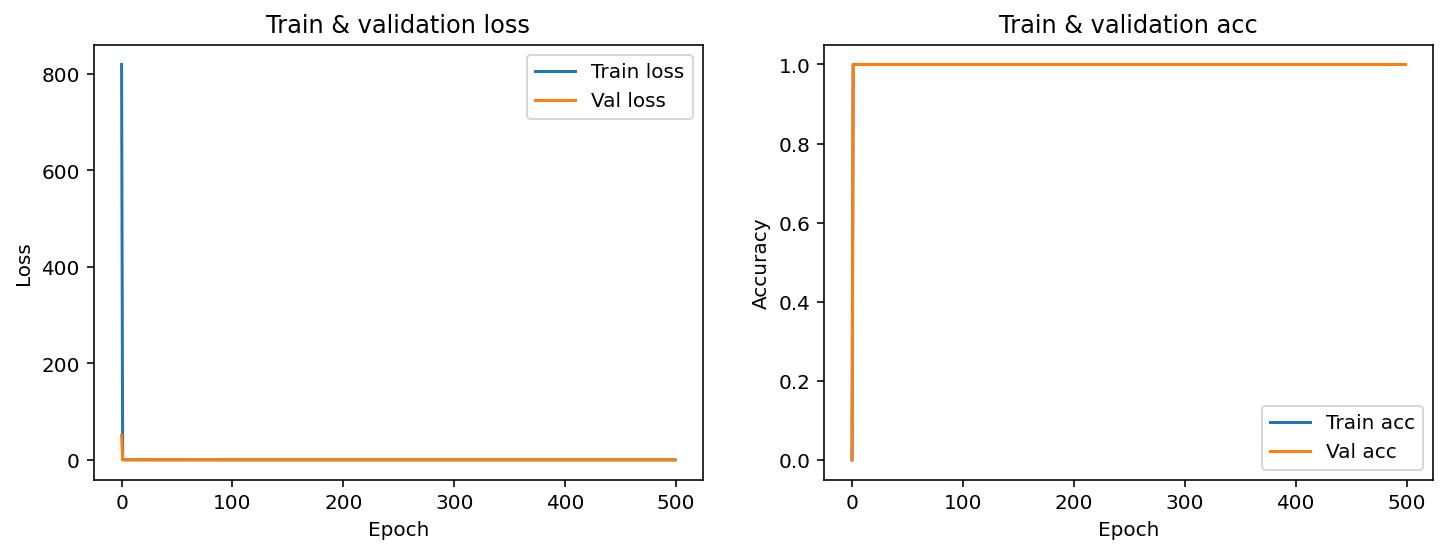

In [ ]:


num_examples = x_train.shape[0]

trainer = SVMTrainer()

trainer.train(x_train, y_train, x_val, y_val)

trainer.evaluate(x_test,y_test)


print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(f"Final train acc: {trainer.train_acc_history[-1]}")
print(f"Final validation acc: {trainer.val_acc_history[-1]}")

print('\n')

print("The model achieved a test loss of {} and a test accuracy of {}.".format(trainer.test_loss,trainer.test_acc))

print('\n')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(len(trainer.train_loss_history)), trainer.train_loss_history, label="Train loss")
ax[0].plot(np.arange(len(trainer.val_loss_history)), trainer.val_loss_history, label="Val loss")
ax[0].set_title("Train & validation loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(np.arange(len(trainer.train_loss_history)), trainer.train_acc_history, label="Train acc")
ax[1].plot(np.arange(len(trainer.val_loss_history)), trainer.val_acc_history, label="Val acc")
ax[1].set_title("Train & validation acc")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

In [ ]:
def plot_decision_boundary(w, b, x) -> None:
    """
    Plot the decision boundary and margin using w and b. Use this function with 
    plot_data().

    Args:
        w: weights, a vector of length 2.
        b: bias, a scalar.
        x: 2-d feature vectors.
    """
    #p = x   

    #x_points = np.linspace(-8, 2)   
    x_points = x 
    y_points = -(w[0] / w[1]) * x_points - b / w[1] 

    margin = 1 / np.linalg.norm(w)
    #print(margin)
    plt.plot(x_points, y_points, c='r');


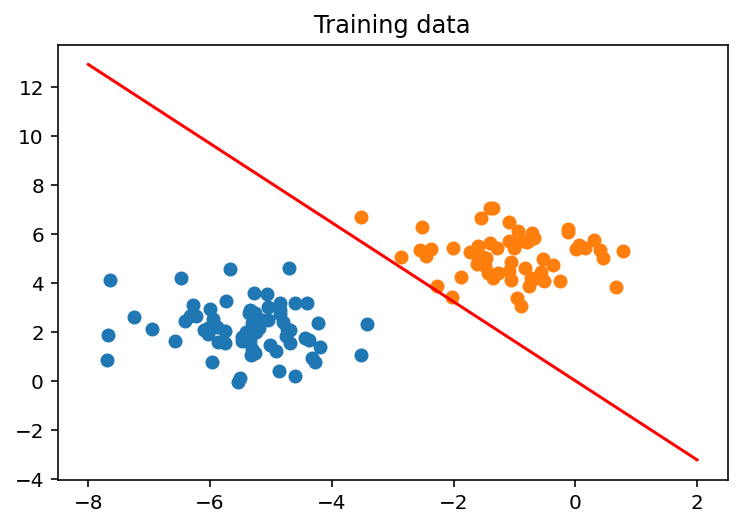

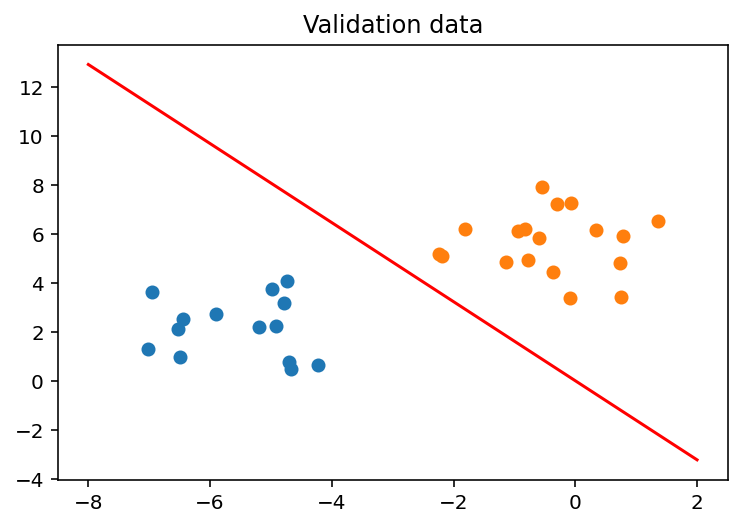

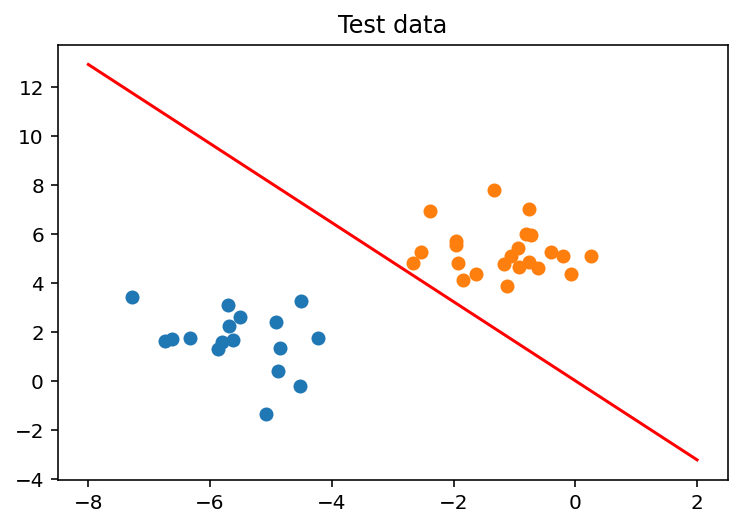

In [ ]:
# Plot the training data along with decision boundary and margin and support vectors

plot_data(x_train, y_train)
plt.title("Training data")
plot_decision_boundary(trainer.w,trainer.b,x_train)
plt.show()

plot_data(x_val, y_val)
plt.title("Validation data")
plot_decision_boundary(trainer.w,trainer.b,x_val)
plt.show()


plot_data(x_test, y_test)
plt.title("Test data")
plot_decision_boundary(trainer.w,trainer.b,x_val)
plt.show()

# Dual

In [ ]:
 
                #  num_examples=x_train.shape[0],
                #  num_features=2,
                #  learning_rate= .0001,
                #  num_epochs = 20,
                #  c = .01,

In [ ]:
class DualSVMTrainer(SVMTrainer):
    def __init__(self, penalty=1.0,**kwargs):
        super().__init__(**kwargs)
        self.penalty = penalty

        self.num_examples = x_train.shape[0]

        # Initialize model parameters alpha.

        self.alpha = np.random.rand(self.num_examples)

    def gradient_descent_step(self, x, y) -> None:
        """
        Perform a single step of gradient update.

        Args:
            x: A matrix of features.
            y: A vector of labels.
        """

        self.alpha -= self.learning_rate*self.hinge_loss_derivative(x,y)

        self.alpha = np.clip(self.alpha, 0, SVMTrainer.c)

    def hinge_loss(self, x, y) -> float:
        """
        Calculates the hinge loss given predictions and targets.

        Args:
            pred: Predicted labels.  -- FALSE! 
            target: Ground-truth labels. -- FALSE! 

        Returns:
            A scalar of loss.
        """

        #hinge_loss = 0.0

        N = self.num_examples

        A = np.sum(self.alpha)

        val = 0


        for i in range(N):

          for j in range(2):

            val += self.alpha[i]*self.alpha[j]*y[i]*y[j]*x[i][j]



        hinge_loss = (A - (val / 2))**2

        return hinge_loss


    def hinge_loss_derivative(self, x, y) -> np.ndarray:
        """
        Calculate the derivative of the loss function w.r.t. theta.

        Args:
            x: Feature vectors.
            y: Ground-truth labels.

        Returns:
            A vector with the same dimension as theta, or w and b if you choose to
            separate them.
        """

        N = self.num_examples

        ones_array = np.ones(N)

        new_array = np.ndarray(0)

        for i in range(N):

          val = 0

          for j in range(2):

            val += self.alpha[i]*y[j]*y[i]*x[i][j]
          
          new_array = np.append(new_array,val)


        other_array = 2*y*self.alpha

        hinge_loss_derivative = -2*( (ones_array - new_array) / 2  ) + other_array # Might need to change this 


    def compute_bw(self, x, y):
        """
        Compute weights and bias given model parameter self.alpha, and training data x
        and y.

        Args:
            x: Feature vectors.
            y: Ground-truth labels.


        Returns:
            A vector with the same dimension as theta, or w and b if you choose to
            separate them.
        """
      
        w = self.alpha*(np.dot(y,x))

        b = np.mean(y - np.dot(x,w))


    def predict(self, x) -> int:
        """
        Predict the label of input examples x.

        Args:
            x: Feature vectors. --> slice of x_set at index j 

        Returns:
            A scalar of either -1 or 1.
        """

        pred_item = np.dot(self.w.T,x) + self.b
        
        return np.sign(pred_item)

    def accuracy(self, pred, target) -> float:
        """
        Calculates the percentage of matched labels given predictions and targets.

        Args:
            pred: Predicted labels (rounded probabilities).
            target: Ground-truth labels.

        Return:
            The accuracy score (a float) given the predicted labels and the true labels.
        """

        accuracy = 0 

        my_len = target.size

        for i in range(my_len):

          if target[i] == pred[i]:

            accuracy += 1
        
        return accuracy / my_len
        

    def train(self, x_train, y_train, x_val, y_val) -> None:
        """
        Run gradient descent for n epochs, where n = self.num_epochs. In every epoch,
            1. Update theta.
            2. Calculate the training loss & accuracy given the current theta, and append 
               then to self.train_loss_history and self.train_acc_history.
            3. Calculate the validation loss & accuracy given the current theta, and 
               append then to self.train_loss_history and self.train_acc_history.

        If you wish to use the bias trick, please remember to use it before the for loop.

        Args:
            x_train: Feature vectors for training.
            y_train: Ground-truth labels for training.
            x_val: Feature vectors for validation.
            y_val: Ground-truth labels for validation.
        """


        for n in  range(self.num_epochs):

          self.gradient_descent_step(x_train, y_train)

          self.b, self.w = self.compute_bw(x_train, y_train)


          train_pred = np.zeros(y_train.size)

          val_pred = np.zeros(y_train.size)



          for j in range(y_train.size):

            train_pred[j] = self.predict(x_train[j,:])

          for j in range(y_val.size):

            val_pred[j] = self.predict(x_val[j,:])



          self.train_loss_history.append( train_loss = self.hinge_loss(x_train, y_train) )

          self.train_acc_history.append(self.accuracy(train_pred, y_train))


          self.val_loss_history.append( self.hinge_loss( val_pred , y_val )  )

          self.val_acc_history.append( self.accuracy( val_pred , y_val )  )



    def evaluate(self, x_test, y_test) -> None:
        """
        Evaluate the model on test set and store the test loss int self.test_loss and 
        test accuracy in self.test_acc.

        Args:
            x_test: Feature vectors for testing.
            y_test: Ground-truth labels for testing.
        """


        test_pred = np.zeros(y_test.size)

        for j in range(y_test.size):

            test_pred[j] = self.predict(x_test[j,:])

        self.test_loss = self.hinge_loss( test_pred , y_test ) 

        self.test_acc = self.accuracy( test_pred , y_test )



In [ ]:


#num_examples = x_train.shape[0]

trainer2 = DualSVMTrainer(trainer)

trainer2.train(x_train, y_train, x_val, y_val)


print(f"Final train loss: {trainer.train_loss_history[-1]}")
print(f"Final validation loss: {trainer.val_loss_history[-1]}")
print(f"Final train acc: {trainer.train_acc_history[-1]}")
print(f"Final validation acc: {trainer.val_acc_history[-1]}")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(len(trainer.train_loss_history)), trainer.train_loss_history, label="Train loss")
ax[0].plot(np.arange(len(trainer.val_loss_history)), trainer.val_loss_history, label="Val loss")
ax[0].set_title("Train & validation loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(np.arange(len(trainer.train_loss_history)), trainer.train_acc_history, label="Train acc")
ax[1].plot(np.arange(len(trainer.val_loss_history)), trainer.val_acc_history, label="Val acc")
ax[1].set_title("Train & validation acc")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

# Evaluation

In [ ]:
# I moved this above 

print(f"Test loss: {svm_trainer.test_loss}")
print(f"Test acc: {svm_trainer.test_acc}")

In [ ]:
print(f"Test loss: {dualsvm_trainer.test_loss}")
print(f"Test acc: {dualsvm_trainer.test_acc}")